![image](./T5_1.jpg)
![image](./T5_2.jpg)
![image](./T5_3.jpg)

In [85]:
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats
from seaborn import boxplot
import scipy as sp

* Генерируем выборку
* Theta = 10

In [86]:
n = 100
theta_true = 10
sample = np.random.random(size=n)*theta_true + theta_true
print(f'{sample=}')

sample=array([11.423359  , 14.81750351, 15.59903465, 17.68429242, 18.00863521,
       11.33698776, 16.79165167, 13.28343027, 19.23000362, 10.25391491,
       13.37479633, 10.71807821, 13.62923581, 19.09248594, 13.59083101,
       10.04241213, 12.92615095, 16.29348245, 12.87075707, 11.6323949 ,
       10.61996767, 11.61679706, 14.79303805, 18.62580086, 17.26782744,
       13.0743881 , 17.86939846, 18.60199664, 10.63561798, 19.79793423,
       19.75907676, 13.51562882, 16.45730297, 19.26178758, 17.0286282 ,
       17.79502267, 12.30650933, 16.04705876, 10.52225944, 16.63362261,
       10.48402084, 13.83285474, 17.01773589, 11.10896717, 14.51916314,
       12.498138  , 19.81654875, 10.71140616, 11.71214682, 15.53844353,
       13.4265781 , 14.00688552, 19.16983148, 15.13815995, 12.72217931,
       16.86482755, 16.21054482, 11.00725845, 19.10854957, 19.02676421,
       13.93152088, 10.64254603, 16.23399395, 17.61898942, 19.5456549 ,
       17.48305798, 15.01039612, 18.10958293, 17.87101867

In [87]:
betta = 0.95
t1 = -1.96
t2 = 1.96
x_mean = np.mean(sample)
theta = 2/3*x_mean
alpha_1 = np.sum(sample)/n
alpha_2 = np.sum(sample**2)/n

In [88]:
btst_iter = 1000
btst_sample = sample[np.random.choice(len(sample), size=(btst_iter, len(sample)))]
variat = np.sort(btst_sample)
print(f"{btst_sample=}")

btst_sample=array([[13.0743881 , 17.86939846, 16.34557973, ..., 10.71140616,
        12.498138  , 11.39242836],
       [11.39242836, 13.4265781 , 12.30650933, ..., 16.29348245,
        12.498138  , 12.87075707],
       [16.21054482, 19.16983148, 11.423359  , ..., 18.80965228,
        10.48402084, 19.02676421],
       ...,
       [14.78110507, 19.5456549 , 16.37959679, ..., 11.49187454,
        19.16983148, 10.64254603],
       [18.00863521, 17.44152311, 10.31189103, ..., 18.80965228,
        14.78110507, 16.40138637],
       [17.48305798, 11.6323949 , 19.79793423, ..., 17.68429242,
        15.13815995, 19.16983148]])


In [89]:
delta = []
for btst_sample_i in btst_sample:
    delta.append(2/3 * np.mean(btst_sample_i) - theta)
delta = np.array(delta)
delta = np.sort(delta)
btst_t1 = delta[int(btst_iter * (1 - betta)/2)]
btst_t2 = delta[int(btst_iter * (1 + betta)/2)]
print(f'{btst_t1=}, {btst_t2=}')

btst_t1=np.float64(-0.3592886827167838), btst_t2=np.float64(0.3819623237933989)


In [90]:
accurate_left = x_mean/(-t1/np.sqrt(12*n)+3/2)
accurate_right = x_mean/(t1/np.sqrt(12*n)+3/2)
print(f"точный д.и.: {accurate_left} <= tetta < {accurate_right}, l:{accurate_right - accurate_left}")
assymptotic_left = -1.96*(alpha_2-alpha_1**2)/np.sqrt(n)+theta
assymptotic_right = 1.96*(alpha_2-alpha_1**2)/np.sqrt(n)+theta
print(f"ассимптотический д.и.: {assymptotic_left} <= theta < {assymptotic_right}, l:{assymptotic_right - assymptotic_left}")
btst_left = theta - btst_t2
btst_right = theta - btst_t1
print(f"бутстраповский д.и.:{btst_left} <= theta <= {btst_right}, l:{btst_right - btst_left}")

точный д.и.: 9.508847619867945 <= tetta < 10.254318547926278, l:0.7454709280583334
ассимптотический д.и.: 8.12281449925463 <= theta < 11.612232342928408, l:3.4894178436737775
бутстраповский д.и.:9.48556109729812 <= theta <= 10.226812103808303, l:0.7412510065101827


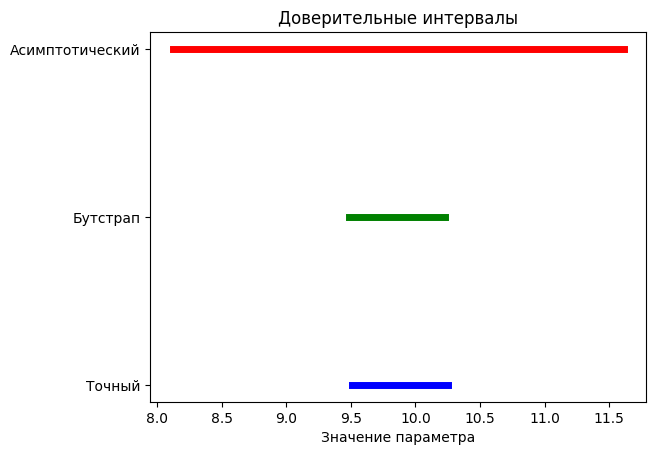

In [91]:
x1 = np.linspace(accurate_left, accurate_right, 100)
y1 = [1] * 100 
x2 = np.linspace(btst_left, btst_right, 100)
y2 = [2] * 100
x3 = np.linspace(assymptotic_left, assymptotic_right, 100)
y3 = [3] * 100

plt.plot(x1, y1, color="blue", linewidth=5)
plt.plot(x2, y2, color="green", linewidth=5)
plt.plot(x3, y3, color="red", linewidth=5)

plt.yticks([1, 2, 3], ["Точный", "Бутстрап", "Асимптотический"])
plt.xlabel("Значение параметра")
plt.title("Доверительные интервалы")

plt.show()